In [2]:
import tensorflow as tf
from pathlib import Path
from PIL import Image
import numpy
import os

In [11]:
# Create the dataset
data_dir = Path('./dataset/mudkip/')

img_height = 200
img_width = 200

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed = 258, # mudkips pokedex number
    image_size=(img_height, img_width),
    crop_to_aspect_ratio=True,
    shuffle=True
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed = 258, # mudkips pokedex number
    image_size=(img_height, img_width),
    crop_to_aspect_ratio=True,
    shuffle=True
)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 13 files belonging to 4 classes.
Using 11 files for training.
Found 13 files belonging to 4 classes.
Using 2 files for validation.


In [ ]:
# Visualize the first 15 items in the dataset
# TODO: Update this to show more eventually when the datasets are bigger
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [49]:
# Create model
# The number of classes may differ depending on the hunt and how it is compiled
# It will either be 2 (target_normal, target_shiny) or 4 (target_normal, target_shiny, not_target_normal, not_target_shiny) 
number_of_classes = len(class_names)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1/.255, input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(number_of_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 200, 200, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 50, 50, 64)      

Epoch 1/10
1/1 [==============================] - 0s 270ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.8614 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 310ms/step - loss: 3.7937e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 298ms/step - loss: 6.5913 - accuracy: 0.9091 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 320ms/step - loss: 3.9239 - accuracy: 0.9091 - val_loss: 2.4241e-04 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 256ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 43.5521 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 266ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 92.5320 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 241ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 153.2644 - val_a

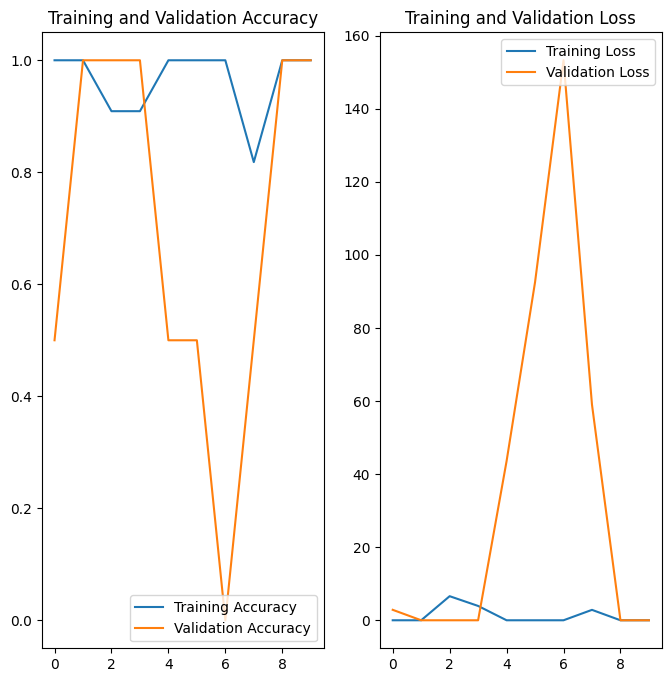

In [53]:
# Train model
epochs = 10
history = model.fit(train_ds, validation_data=valid_ds, epochs=epochs)

# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
# tesing grounds
img = tf.keras.utils.load_img('test.PNG', target_size=(img_height, img_width))
img

OSError: [Errno 22] Invalid argument: 'test.PNG'